<a href="https://colab.research.google.com/github/LuisHenrique7/TCC_Testes_Agrupamento/blob/main/(Geral)Analise_dos_Modelos_de_Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Lendo Conjunto de Dados

In [ ]:
df_votos_deputados = pd.read_csv('/content/drive/MyDrive/TCC II/APP 2/Datasets Gerados/VotacaoDosDeputados(23_03_23).csv')
df_votos_deputados

,id_deputado,nome,siglaPartido,siglaUf,Votacao 2301683-33,Votacao 2350702-8,Votacao 2350706-6,Votacao 2351332-7
0,220593,Abilio Brunini,PL,MT,Sim,Sim,Vazio,Não
1,204379,Acácio Favacho,MDB,AP,Não,Sim,Sim,Vazio
2,220714,Adail Filho,REPUBLICANOS,AM,Vazio,Sim,Não,Sim
3,221328,Adilson Barroso,PL,SP,Vazio,Sim,Vazio,Sim
4,204560,Adolfo Viana,PSDB,BA,Vazio,Vazio,Vazio,Vazio
...,...,...,...,...,...,...,...,...
508,160632,Zé Silva,SOLIDARIEDADE,MG,Não,Sim,Sim,Sim
509,220558,Zé Trovão,PL,SC,Sim,Sim,Não,Não
510,204517,Zé Vitor,PL,MG,Vazio,Vazio,Sim,Sim
511,160592,Zeca Dirceu,PT,PR,Vazio,Vazio,Vazio,Sim


In [ ]:
df_proposicoes_temas_deputados = pd.read_json('/content/drive/MyDrive/TCC II/APP 2/Datasets Gerados/TemaProposicaoDosDeputados.json')
df_proposicoes_temas_deputados.columns = ['id_deputado', 'nome',	'proposicoes',	'temas_proposicoes']
df_proposicoes_temas_deputados

,id_deputado,nome,proposicoes,temas_proposicoes
0,220593,Abilio Brunini,"[2352557, 2352553, 2352549, 2352547, 2352524, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
1,204379,Acácio Favacho,"[2352547, 2352545, 2352541, 2352476, 2352473, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
2,220714,Adail Filho,"[2352559, 2352556, 2352549, 2352548, 2352547, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
3,221328,Adilson Barroso,"[2352062, 2352046, 2351960, 2351680, 2351620, ...","[Sem tema, Sem tema, Sem tema, [Direito Penal ..."
4,204560,Adolfo Viana,"[2352559, 2352547, 2352545, 2352514, 2352501, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
...,...,...,...,...
508,160632,Zé Silva,"[2352559, 2352557, 2352549, 2352545, 2352473, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
509,220558,Zé Trovão,"[2352549, 2352545, 2352541, 2352524, 2352521, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
510,204517,Zé Vitor,"[2352596, 2352557, 2352556, 2352476, 2352049, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
511,160592,Zeca Dirceu,"[2352556, 2352547, 2352445, 2352444, 2351948, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."


In [ ]:
df_caracteristicas_deputados_geral = pd.merge(df_votos_deputados, df_proposicoes_temas_deputados, left_on='id_deputado', right_on='id_deputado', suffixes=('', '_df_temas'))
df_caracteristicas_deputados_geral

,id_deputado,nome,siglaPartido,siglaUf,Votacao 2301683-33,Votacao 2350702-8,Votacao 2350706-6,Votacao 2351332-7,nome_df_temas,proposicoes,temas_proposicoes
0,220593,Abilio Brunini,PL,MT,Sim,Sim,Vazio,Não,Abilio Brunini,"[2352557, 2352553, 2352549, 2352547, 2352524, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
1,204379,Acácio Favacho,MDB,AP,Não,Sim,Sim,Vazio,Acácio Favacho,"[2352547, 2352545, 2352541, 2352476, 2352473, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
2,220714,Adail Filho,REPUBLICANOS,AM,Vazio,Sim,Não,Sim,Adail Filho,"[2352559, 2352556, 2352549, 2352548, 2352547, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
3,221328,Adilson Barroso,PL,SP,Vazio,Sim,Vazio,Sim,Adilson Barroso,"[2352062, 2352046, 2351960, 2351680, 2351620, ...","[Sem tema, Sem tema, Sem tema, [Direito Penal ..."
4,204560,Adolfo Viana,PSDB,BA,Vazio,Vazio,Vazio,Vazio,Adolfo Viana,"[2352559, 2352547, 2352545, 2352514, 2352501, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
...,...,...,...,...,...,...,...,...,...,...,...
508,160632,Zé Silva,SOLIDARIEDADE,MG,Não,Sim,Sim,Sim,Zé Silva,"[2352559, 2352557, 2352549, 2352545, 2352473, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
509,220558,Zé Trovão,PL,SC,Sim,Sim,Não,Não,Zé Trovão,"[2352549, 2352545, 2352541, 2352524, 2352521, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
510,204517,Zé Vitor,PL,MG,Vazio,Vazio,Sim,Sim,Zé Vitor,"[2352596, 2352557, 2352556, 2352476, 2352049, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
511,160592,Zeca Dirceu,PT,PR,Vazio,Vazio,Vazio,Sim,Zeca Dirceu,"[2352556, 2352547, 2352445, 2352444, 2351948, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."


# Codifica Colunas com características categóricas

## Colunas de votação

### Factorize

In [ ]:
# Votacao 2301683-33	Votacao 2350702-8	Votacao 2350706-6	Votacao 2351332-7

In [ ]:
print(len(df_caracteristicas_deputados_geral['Votacao 2301683-33']))
print(len(df_caracteristicas_deputados_geral['Votacao 2350702-8']))
print(len(df_caracteristicas_deputados_geral['Votacao 2350706-6']))
print(len(df_caracteristicas_deputados_geral['Votacao 2351332-7']))

513
513
513
513


In [ ]:
tipo_voto_codificado = np.concatenate((df_caracteristicas_deputados_geral['Votacao 2301683-33'].values, df_caracteristicas_deputados_geral['Votacao 2350702-8'].values), axis=0)
tipo_voto_codificado = np.concatenate((tipo_voto_codificado, df_caracteristicas_deputados_geral['Votacao 2350706-6'].values), axis=0)
tipo_voto_codificado = np.concatenate((tipo_voto_codificado, df_caracteristicas_deputados_geral['Votacao 2351332-7'].values), axis=0)
tipo_voto_codificado = pd.factorize(tipo_voto_codificado)[0]
print(len(tipo_voto_codificado))
tipo_voto_codificado

2052


array([0, 1, 2, ..., 0, 0, 0])

In [ ]:
n_cols = 4
limite = []

for i in range(len(df_caracteristicas_deputados_geral), n_cols * len(df_caracteristicas_deputados_geral), len(df_caracteristicas_deputados_geral)):
  print(i, end='   ')
  limite.append(i)

513   1026   1539   

In [ ]:
lista_votacao_codificado_2301683_33 = tipo_voto_codificado[:limite[0]]
lista_votacao_codificado_2350702_8 = tipo_voto_codificado[limite[0] : limite[1]]
lista_votacao_codificado_2350706_6 = tipo_voto_codificado[limite[1] : limite[2]]
lista_votacao_codificado_2351332_7 = tipo_voto_codificado[limite[2] : ]

print(len(lista_votacao_codificado_2301683_33))
print(len(lista_votacao_codificado_2350702_8))
print(len(lista_votacao_codificado_2350706_6))
print(len(lista_votacao_codificado_2351332_7))

513
513
513
513


### One Hot

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['Votacao 2301683-33']]
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
lista_votacao_one_hot_2301683_33 = enc.transform(dados_para_codificar).toarray()
print(lista_votacao_one_hot_2301683_33.shape)
lista_votacao_one_hot_2301683_33

(513, 4)


array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['Votacao 2350702-8']]
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
lista_votacao_one_hot_2350702_8 = enc.transform(dados_para_codificar).toarray()
print(lista_votacao_one_hot_2350702_8.shape)
lista_votacao_one_hot_2350702_8

(513, 3)


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['Votacao 2350706-6']]
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
lista_votacao_one_hot_2350706_6 = enc.transform(dados_para_codificar).toarray()
print(lista_votacao_one_hot_2350706_6.shape)
lista_votacao_one_hot_2350706_6

(513, 5)


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['Votacao 2351332-7']]
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
lista_votacao_one_hot_2351332_7 = enc.transform(dados_para_codificar).toarray()
print(lista_votacao_one_hot_2351332_7.shape)
lista_votacao_one_hot_2351332_7

(513, 5)


array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
print(len(lista_votacao_one_hot_2301683_33))
print(len(lista_votacao_one_hot_2350702_8))
print(len(lista_votacao_one_hot_2350706_6))
print(len(lista_votacao_one_hot_2351332_7))

513
513
513
513


In [ ]:
votos_codificados_one_hot = np.concatenate((lista_votacao_one_hot_2301683_33, lista_votacao_one_hot_2350702_8), axis=1)
votos_codificados_one_hot = np.concatenate((votos_codificados_one_hot, lista_votacao_one_hot_2350706_6), axis=1)
votos_codificados_one_hot = np.concatenate((votos_codificados_one_hot, lista_votacao_one_hot_2351332_7), axis=1)

print(votos_codificados_one_hot.shape)
votos_codificados_one_hot

(513, 17)


array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Coluna Estado e Partido

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['siglaUf']]
dados_para_codificar

,siglaUf
0,MT
1,AP
2,AM
3,SP
4,BA
...,...
508,MG
509,SC
510,MG
511,PR


In [ ]:
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
uf_codificado = enc.transform(dados_para_codificar).toarray()
print(uf_codificado.shape)
uf_codificado

(513, 27)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# uf_codificado = pd.factorize(np.ravel(dados_para_codificar.values))[0]
# uf_codificado

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['siglaPartido']]
dados_para_codificar

,siglaPartido
0,PL
1,MDB
2,REPUBLICANOS
3,PL
4,PSDB
...,...
508,SOLIDARIEDADE
509,PL
510,PL
511,PT


In [ ]:
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
partido_codificado = enc.transform(dados_para_codificar).toarray()
print(partido_codificado.shape)
partido_codificado

(513, 22)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# partido_codificado = pd.factorize(np.ravel(dados_para_codificar.values))[0]
# partido_codificado

## Coluna Temas

In [ ]:
lista_temas = []

for i in df_proposicoes_temas_deputados.index[:1]:
  temas = df_proposicoes_temas_deputados['temas_proposicoes'][i]
  for tema in temas:
    if type(tema) == list:
      for t in tema:
        if t not in lista_temas:
          lista_temas.append(t)
    else:
      if tema not in lista_temas:
          lista_temas.append(tema)

print(len(lista_temas))

9


In [ ]:
qtde_proposicoes_tema_geral = []

for i in df_proposicoes_temas_deputados.index:
  qtde_proposicoes_tema = [0 for _ in lista_temas]
  temas = df_proposicoes_temas_deputados['temas_proposicoes'][i]
  for tema in temas:
    if type(tema) == list:
      for t in tema:
        if t in lista_temas:
          qtde_proposicoes_tema[lista_temas.index(t)] += 1
    else:
      if tema in lista_temas:
        qtde_proposicoes_tema[lista_temas.index(tema)] += 1
  qtde_proposicoes_tema_geral.append(qtde_proposicoes_tema)

np.array(qtde_proposicoes_tema_geral).shape

(513, 9)

In [ ]:
df_qtde_temas_deputados = pd.DataFrame(qtde_proposicoes_tema_geral, columns=lista_temas)
df_qtde_temas_deputados.insert(0, 'id_deputado', list(df_caracteristicas_deputados_geral['id_deputado']))
df_qtde_temas_deputados

,id_deputado,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
0,220593,82,2,4,1,1,2,2,2,1
1,204379,63,1,3,1,0,0,1,0,2
2,220714,128,1,3,0,2,0,0,0,1
3,221328,43,2,2,0,1,1,1,1,1
4,204560,40,1,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
508,160632,112,1,1,0,1,0,0,0,2
509,220558,112,2,4,1,1,2,2,2,1
510,204517,58,2,5,1,1,2,2,2,1
511,160592,130,0,0,0,0,0,0,0,0


# Seleciona dados para o treinamento

In [ ]:
df_caracteristicas_selecionadas_deputados = df_caracteristicas_deputados_geral.iloc[: , [0,1]]

# df_caracteristicas_selecionadas_deputados['partido'] = partido_codificado.tolist()
# df_caracteristicas_selecionadas_deputados['estado'] = uf_codificado.tolist()
df_caracteristicas_selecionadas_deputados['Votacao 2301683_33'] = lista_votacao_codificado_2301683_33
df_caracteristicas_selecionadas_deputados['Votacao 2350702_8'] = lista_votacao_codificado_2350702_8
df_caracteristicas_selecionadas_deputados['Votacao 2350706_6'] = lista_votacao_codificado_2350706_6
df_caracteristicas_selecionadas_deputados['Votacao 2351332_7'] = lista_votacao_codificado_2351332_7

df_caracteristicas_selecionadas_deputados

<ipython-input-28-1d198d0d1a2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caracteristicas_selecionadas_deputados['Votacao 2301683_33'] = lista_votacao_codificado_2301683_33
<ipython-input-28-1d198d0d1a2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caracteristicas_selecionadas_deputados['Votacao 2350702_8'] = lista_votacao_codificado_2350702_8
<ipython-input-28-1d198d0d1a2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7
0,220593,Abilio Brunini,0,0,2,1
1,204379,Acácio Favacho,1,0,0,2
2,220714,Adail Filho,2,0,1,0
3,221328,Adilson Barroso,2,0,2,0
4,204560,Adolfo Viana,2,2,2,2
...,...,...,...,...,...,...
508,160632,Zé Silva,1,0,0,0
509,220558,Zé Trovão,0,0,1,1
510,204517,Zé Vitor,2,2,0,0
511,160592,Zeca Dirceu,2,2,2,0


In [ ]:
df_caracteristicas_selecionadas_deputados = df_caracteristicas_selecionadas_deputados.merge(df_qtde_temas_deputados, left_on='id_deputado', right_on='id_deputado')
df_caracteristicas_selecionadas_deputados

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
0,220593,Abilio Brunini,0,0,2,1,82,2,4,1,1,2,2,2,1
1,204379,Acácio Favacho,1,0,0,2,63,1,3,1,0,0,1,0,2
2,220714,Adail Filho,2,0,1,0,128,1,3,0,2,0,0,0,1
3,221328,Adilson Barroso,2,0,2,0,43,2,2,0,1,1,1,1,1
4,204560,Adolfo Viana,2,2,2,2,40,1,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,160632,Zé Silva,1,0,0,0,112,1,1,0,1,0,0,0,2
509,220558,Zé Trovão,0,0,1,1,112,2,4,1,1,2,2,2,1
510,204517,Zé Vitor,2,2,0,0,58,2,5,1,1,2,2,2,1
511,160592,Zeca Dirceu,2,2,2,0,130,0,0,0,0,0,0,0,0


# Ajustando características multidimensionais

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
print(X.shape)
X

(513, 6)


array([[list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        0, 0, 2, 1],
       [list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        list([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        1, 0, 0, 2],
       [list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]),
        list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        2, 0, 1, 0],
       ...,
       [list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
for i in X:
  i[0] = np.array(i[0])
  i[1] = np.array(i[1])

In [ ]:
X.ravel()

array([array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0.])                                               ,
       array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                           ,
       0, ..., 0, 2, 0], dtype=object)

In [ ]:
X = X.ravel().reshape(len(df_caracteristicas_selecionadas_deputados), -1)
print(X.shape)
X

(513, 6)


array([[array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0.])                                               ,
        array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                           ,
        0, 0, 2, 1],
       [array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0.])                                               ,
        array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                           ,
        1, 0, 0, 2],
       [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 1., 0., 0.])                                               ,
        array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0

In [ ]:
df_caracteristicas_selecionadas_deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 512
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_deputado         513 non-null    int64 
 1   nome                513 non-null    object
 2   partido             513 non-null    int64 
 3   estado              513 non-null    int64 
 4   Votacao 2301683_33  513 non-null    int64 
 5   Votacao 2350702_8   513 non-null    int64 
 6   Votacao 2350706_6   513 non-null    int64 
 7   Votacao 2351332_7   513 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 36.1+ KB


# Usando MeanShift

In [ ]:
# The following bandwidth can be automatically detected using
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:]

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

number of estimated clusters : 4
Silhouette Coefficient: 0.568


In [ ]:
# print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
# print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
# print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
# print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
# print(
#     "Adjusted Mutual Information:"
#     f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
# )
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

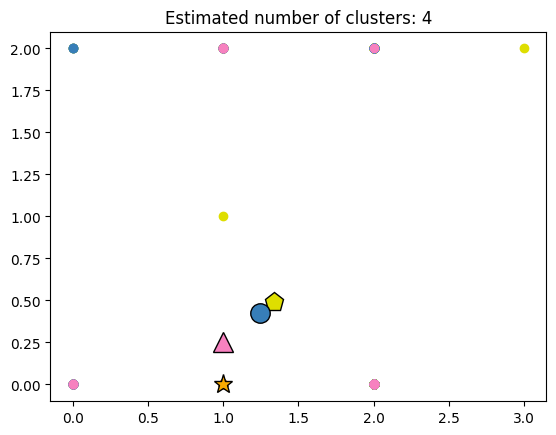

In [ ]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
markers = ["p", "o", "^", '*', 's']

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 0], df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 1], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# GaussianMixture

In [ ]:
X = votos_codificados_one_hot
X.shape

(513, 17)

Silhouette Coefficient: 0.212


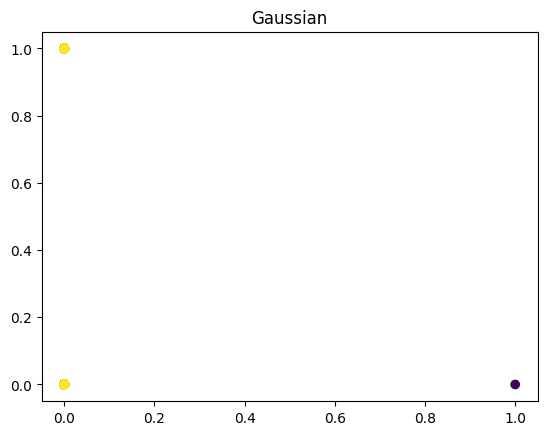

In [ ]:
gaussian = GaussianMixture(n_components=3, covariance_type="full")
gaussian.fit(X)
y_pred = gaussian.predict(X)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, y_pred):.3f}")


plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Gaussian")
plt.show()

In [ ]:
pca = PCA(n_components=2).fit_transform(X)
pca

array([[14.00026147,  2.37638256],
       [-5.04253589, -0.07524725],
       [59.94907389, -0.99198812],
       ...,
       [-9.99582112,  3.1559445 ],
       [61.89946423, -4.05875836],
       [10.93515268, -1.68538481]])

Silhouette Coefficient: 0.623


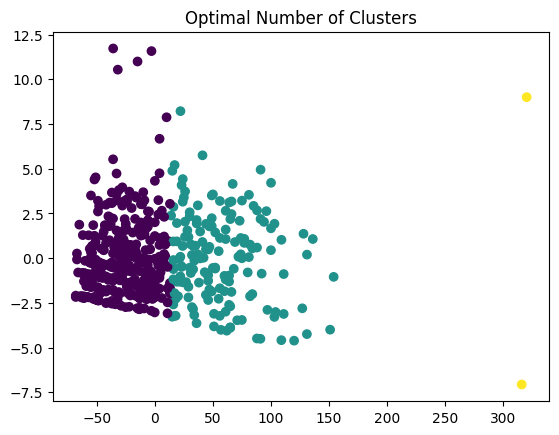

In [ ]:
X = pca

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}


k_means = KMeans(n_clusters=3, **common_params)
k_means.fit(X)
labels = k_means.labels_

print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

y_pred = k_means.predict(X)
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

# DBSCAN

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:]

# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(X)
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

db = DBSCAN(eps=0.5, min_samples=200).fit(X)
labels = db.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

number of estimated clusters : 1


ValueError: ignored

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values

db = DBSCAN(eps=0.3, min_samples=200).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 0
Estimated number of noise points: 513


In [ ]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
markers = ["p", "o", "^", '*', 's']

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 0], df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 1], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# One Hot (Apenas votações) {votos_codificados_one_hot}

## KMeans

In [ ]:
X = votos_codificados_one_hot
X.shape

(513, 17)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.308

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.281

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.281

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.303

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.306

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.297

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.276

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.302

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.306

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.221

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.306

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.275

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.302

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.293

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.305

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 60, 'silhouette': 0.4395943656656233}

Best Silhouette Coefficient: 0.440




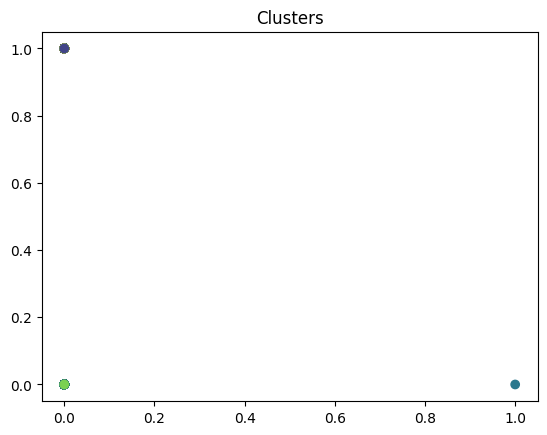

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans MinMaxScaler

In [ ]:
X = votos_codificados_one_hot
X.shape

(513, 17)

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.308

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.281

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.281

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.303

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.306

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.297

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.276

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.302

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.306

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.221

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.306

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.275

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.302

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.293

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.305

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 60, 'silhouette': 0.4395943656656233}

Best Silhouette Coefficient: 0.440




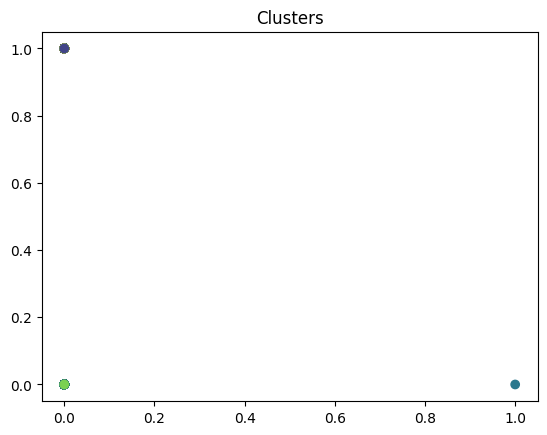

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA

In [ ]:
X = votos_codificados_one_hot
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.404

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.424

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.443

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.417

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.417

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.414

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.424

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.404

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 170, 'silhouette': 0.6249423365499397}

Best Silhouette Coefficient: 0.625




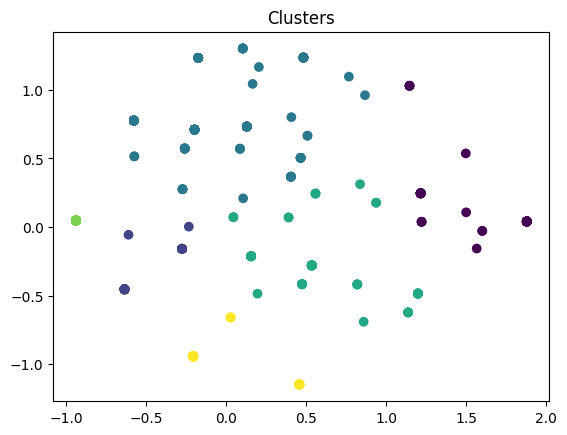

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA com MinMaxScaler

In [ ]:
X = votos_codificados_one_hot
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.404

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.424

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.443

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.425

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.417

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.417

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.414

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.424

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.404

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 170, 'silhouette': 0.6249423363115277}

Best Silhouette Coefficient: 0.625




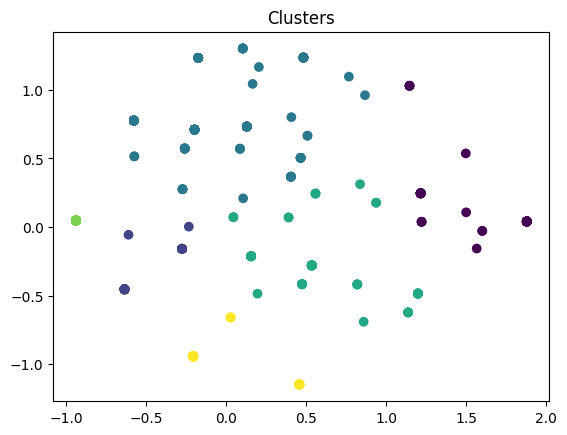

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## Usando MeanShift

In [ ]:
X = votos_codificados_one_hot
X.shape

(513, 17)

In [ ]:
[print(q/10, s) for q in range(0, 11) for s in range(100, 201, 50)]

0.0 100
0.0 150
0.0 200
0.1 100
0.1 150
0.1 200
0.2 100
0.2 150
0.2 200
0.3 100
0.3 150
0.3 200
0.4 100
0.4 150
0.4 200
0.5 100
0.5 150
0.5 200
0.6 100
0.6 150
0.6 200
0.7 100
0.7 150
0.7 200
0.8 100
0.8 150
0.8 200
0.9 100
0.9 150
0.9 200
1.0 100
1.0 150
1.0 200


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
list_estimate_bandwidth = [estimate_bandwidth(X, quantile=q/10, n_samples=s) for q in range(1, 11) for s in range(100, 201, 50)]
list_estimate_bandwidth

[1.159238815542512,
 1.0508157757605745,
 1.0402438661763953,
 1.3174011537017762,
 1.5977599794961923,
 1.5811626970967632,
 1.719228506521606,
 1.7349848103858296,
 1.6656232453697057,
 1.7831140408771682,
 1.8892805863545035,
 1.8615137264825816,
 1.9114360833716901,
 2.0345865674675134,
 1.9015618067505473,
 2.148593370897071,
 2.131850324549733,
 2.1213622305514583,
 2.2198062061341775,
 2.2151633860964854,
 2.2026630179203632,
 2.3629374002165933,
 2.4700487441927015,
 2.4634979466239177,
 2.5101197238972603,
 2.542960963667388,
 2.5404347144543014,
 2.828427124746192,
 2.8284271247461907,
 2.828427124746191]

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 1.159238815542512, quantile = 1, n_samples = 100
number of estimated clusters : 49
Silhouette Coefficient: 0.969


bandwidth = 1.0508157757605745, quantile = 1, n_samples = 150
number of estimated clusters : 49
Silhouette Coefficient: 0.969


bandwidth = 1.0402438661763953, quantile = 1, n_samples = 200
number of estimated clusters : 49
Silhouette Coefficient: 0.969


bandwidth = 1.3174011537017762, quantile = 2, n_samples = 100
number of estimated clusters : 49
Silhouette Coefficient: 0.969


bandwidth = 1.5977599794961923, quantile = 2, n_samples = 150
number of estimated clusters : 2
Silhouette Coefficient: 0.297


bandwidth = 1.5811626970967632, quantile = 2, n_samples = 200
number of estimated clusters : 2
Silhouette Coefficient: 0.295




In [ ]:
best_model

{'quantile': 1,
 'n_samples': 100,
 'labels': array([29, 14, 10,  5,  2,  4,  6,  7,  7,  0, 21,  0, 14, 12,  9, 20, 15,
        34,  1,  0,  3,  0,  8,  6,  4, 14,  8,  2, 10, 12,  9, 10, 28,  0,
        17,  0, 13, 10,  0,  8,  0, 15,  8, 23,  7, 10, 15,  4,  6,  1, 33,
         9,  2,  8, 10,  5, 17, 14, 15,  0,  1,  0,  0, 11,  5,  0, 26,  3,
         0, 11,  4,  5, 14, 12, 18, 29, 27, 16,  3,  0, 12,  4,  6,  1,  6,
        12,  0,  1,  0,  8, 39, 21,  0,  0,  0,  0, 12,  0,  9,  0,  0,  5,
         0,  3,  3, 13,  8,  8, 28,  1,  1, 11,  0,  9,  5,  1,  9,  1, 16,
         2, 45,  9,  4, 13,  4,  2, 35,  4,  3,  6,  1,  0, 31, 14, 18,  1,
         0,  0,  0, 27, 10,  4,  5,  2,  2,  1, 41,  1,  0,  0,  0, 14,  2,
         0,  1,  1,  5, 30,  6,  0,  6,  0,  7,  7,  1,  7,  0, 12, 19,  1,
         1, 23, 21,  0,  1,  2,  1,  7,  1,  3, 15,  5, 25,  1,  7,  9,  1,
        16,  0, 43,  1,  0,  1, 11,  7,  7, 19,  0,  7, 40, 26, 18,  4,  0,
         0, 22, 17,  3,  0,  3, 27,  4,  6,

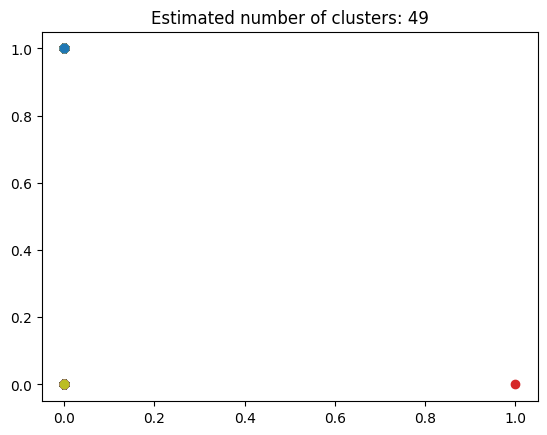

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X[my_members, 0], X[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Usando MeanShift PCA

In [ ]:
X = votos_codificados_one_hot
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 0.4180849709890673, quantile = 1, n_samples = 100
number of estimated clusters : 13
Silhouette Coefficient: 0.785


bandwidth = 0.3771587559433033, quantile = 1, n_samples = 150
number of estimated clusters : 15
Silhouette Coefficient: 0.800


bandwidth = 0.3773352315133575, quantile = 1, n_samples = 200
number of estimated clusters : 15
Silhouette Coefficient: 0.800


bandwidth = 0.6272367701531842, quantile = 2, n_samples = 100
number of estimated clusters : 7
Silhouette Coefficient: 0.574


bandwidth = 0.7712633619896276, quantile = 2, n_samples = 150
number of estimated clusters : 4
Silhouette Coefficient: 0.443


bandwidth = 0.7780422142857663, quantile = 2, n_samples = 200
number of estimated clusters : 4
Silhouette Coefficient: 0.443


bandwidth = 0.8928444404468923, quantile = 3, n_samples = 100
number of estimated clusters : 4
Silhouette Coefficient: 0.472


bandwidth = 0.9307285859250446, quantile = 3, n_samples = 150
number of estimated clusters : 4
Silhouette Co

In [ ]:
best_model

{'quantile': 1,
 'n_samples': 150,
 'labels': array([ 6,  2,  3,  3,  5,  7,  2,  9,  9,  0, 13,  0,  2,  6,  4,  6, 12,
         0,  1,  0,  2,  0,  8,  2,  7,  2,  8,  5,  3,  6,  4,  3, 10,  0,
         6,  0, 11,  3,  0,  8,  0, 12,  8, 12,  9,  3, 12,  7,  2,  1, 14,
         4,  5,  8,  3,  3,  6,  2, 12,  0,  1,  0,  0, 10,  3,  0,  6,  2,
         0, 10,  7,  3,  2,  6, 11,  6,  8,  3,  2,  0,  6,  7,  2,  1,  2,
         6,  0,  1,  0,  8, 13, 13,  0,  0,  0,  0,  6,  0,  4,  0,  0,  3,
         0,  2,  2, 11,  8,  8, 10,  1,  1, 10,  0,  4,  3,  1,  4,  1,  3,
         5,  3,  4,  7, 11,  7,  5,  2,  7,  2,  2,  1,  0,  8,  2, 11,  1,
         0,  0,  0,  8,  3,  7,  3,  5,  5,  1,  6,  1,  0,  0,  0,  2,  5,
         0,  1,  1,  3,  3,  2,  0,  2,  0,  9,  9,  1,  9,  0,  6,  6,  1,
         1, 12, 13,  0,  1,  5,  1,  9,  1,  2, 12,  3,  1,  1,  9,  4,  1,
         3,  0,  6,  1,  0,  1, 10,  9,  9,  6,  0,  9, 13,  6, 11,  7,  0,
         0, 10,  6,  2,  0,  2,  8,  7,  2,

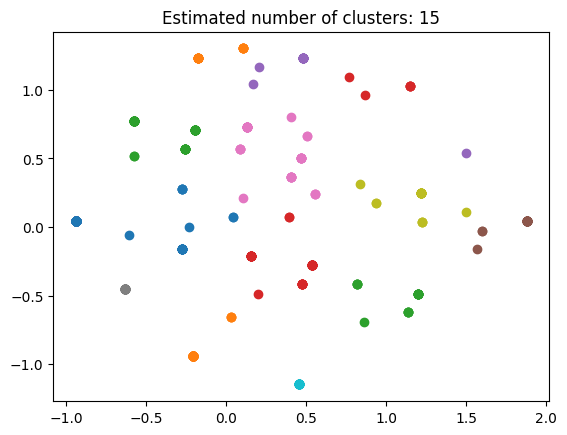

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Usando MeanShift PCA Com MinMaxScaler

In [ ]:
X = votos_codificados_one_hot
X

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 0.41808497100309133, quantile = 1, n_samples = 100
number of estimated clusters : 13
Silhouette Coefficient: 0.785


bandwidth = 0.37715875594290404, quantile = 1, n_samples = 150
number of estimated clusters : 15
Silhouette Coefficient: 0.800


bandwidth = 0.3773352315285252, quantile = 1, n_samples = 200
number of estimated clusters : 15
Silhouette Coefficient: 0.800


bandwidth = 0.6272367701551151, quantile = 2, n_samples = 100
number of estimated clusters : 7
Silhouette Coefficient: 0.574


bandwidth = 0.7712633619891267, quantile = 2, n_samples = 150
number of estimated clusters : 4
Silhouette Coefficient: 0.443


bandwidth = 0.7780422142847775, quantile = 2, n_samples = 200
number of estimated clusters : 4
Silhouette Coefficient: 0.443


bandwidth = 0.8928444404420303, quantile = 3, n_samples = 100
number of estimated clusters : 4
Silhouette Coefficient: 0.472


bandwidth = 0.93072858592817, quantile = 3, n_samples = 150
number of estimated clusters : 4
Silhouette Co

In [ ]:
best_model

{'quantile': 1,
 'n_samples': 150,
 'labels': array([ 6,  2,  3,  3,  5,  7,  2,  9,  9,  0, 13,  0,  2,  6,  4,  6, 12,
         0,  1,  0,  2,  0,  8,  2,  7,  2,  8,  5,  3,  6,  4,  3, 10,  0,
         6,  0, 11,  3,  0,  8,  0, 12,  8, 12,  9,  3, 12,  7,  2,  1, 14,
         4,  5,  8,  3,  3,  6,  2, 12,  0,  1,  0,  0, 10,  3,  0,  6,  2,
         0, 10,  7,  3,  2,  6, 11,  6,  8,  3,  2,  0,  6,  7,  2,  1,  2,
         6,  0,  1,  0,  8, 13, 13,  0,  0,  0,  0,  6,  0,  4,  0,  0,  3,
         0,  2,  2, 11,  8,  8, 10,  1,  1, 10,  0,  4,  3,  1,  4,  1,  3,
         5,  3,  4,  7, 11,  7,  5,  2,  7,  2,  2,  1,  0,  8,  2, 11,  1,
         0,  0,  0,  8,  3,  7,  3,  5,  5,  1,  6,  1,  0,  0,  0,  2,  5,
         0,  1,  1,  3,  3,  2,  0,  2,  0,  9,  9,  1,  9,  0,  6,  6,  1,
         1, 12, 13,  0,  1,  5,  1,  9,  1,  2, 12,  3,  1,  1,  9,  4,  1,
         3,  0,  6,  1,  0,  1, 10,  9,  9,  6,  0,  9, 13,  6, 11,  7,  0,
         0, 10,  6,  2,  0,  2,  8,  7,  2,

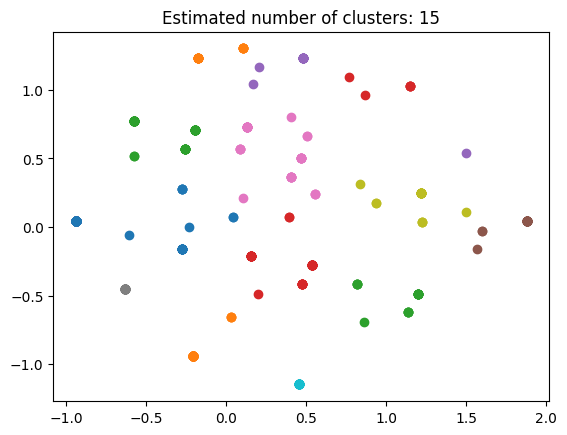

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## GaussianMixture

In [ ]:
X = votos_codificados_one_hot
X.shape

(513, 17)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X)
    labels = gaussiam.predict(X)
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.178

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.279

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.299

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.240

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.293

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.303

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.304

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.298

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.371

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.350

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.339

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.339

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.369

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 6,
 'covariance_type': 'diag',
 'silhouette': 0.4361577915666031}

Best Silhouette Coefficient: 0.436




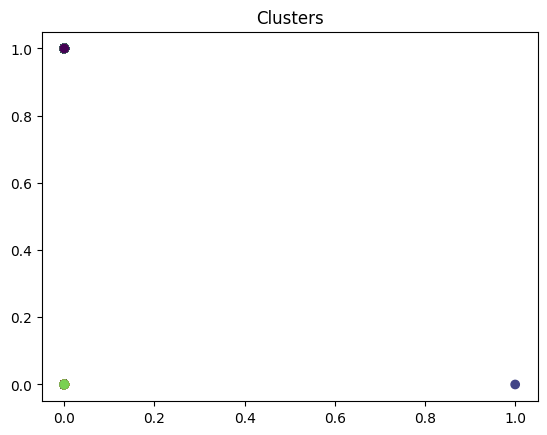

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture MinMaxScaler

In [ ]:
X = votos_codificados_one_hot
X.shape

(513, 17)

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X)
    labels = gaussiam.predict(X)
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.179

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.278

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.277

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.240

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.309

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.303

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.328

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.254

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.292

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.329

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.345

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.336

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.337

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 6,
 'covariance_type': 'diag',
 'silhouette': 0.4322558127212581}

Best Silhouette Coefficient: 0.432




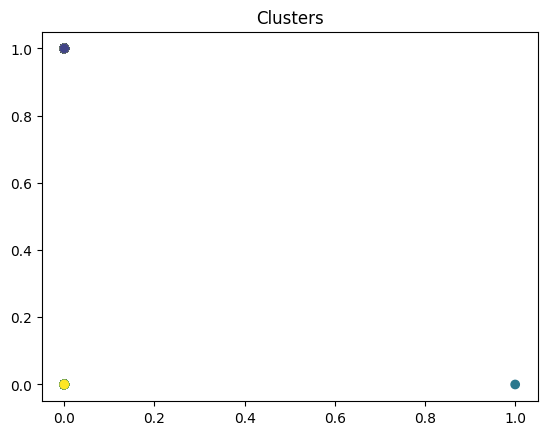

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture PCA

In [ ]:
X = votos_codificados_one_hot
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X_pca)
    labels = gaussiam.predict(X_pca)
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.388

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.394

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.405

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.257

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.423

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.364

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.311

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.456

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.529

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.562

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.412

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.538

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.518

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 5,
 'covariance_type': 'tied',
 'silhouette': 0.5893270878804105}

Best Silhouette Coefficient: 0.589




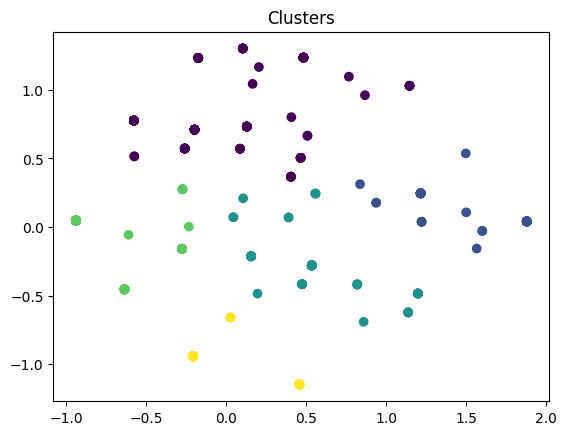

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture PCA MinMaxScaler

In [ ]:
X = votos_codificados_one_hot
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X_pca)
    labels = gaussiam.predict(X_pca)
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.388

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.428

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.424

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.409

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.451

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.409

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.407

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.311

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.556

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.562

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.511

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.538

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.563

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 5,
 'covariance_type': 'tied',
 'silhouette': 0.5893270877307707}

Best Silhouette Coefficient: 0.589




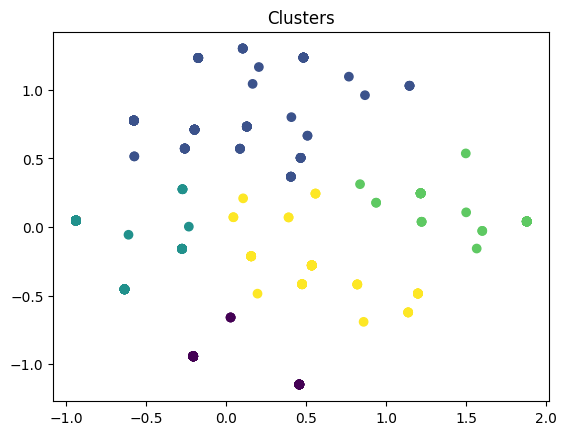

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

# One Hot (votações, estado e partido)
# {votos_codificados_one_hot + uf_codificado + partido_codificado}

## Conjunto de experimento

In [ ]:
X_0 = np.concatenate((votos_codificados_one_hot, uf_codificado), axis=1)
X_0 = np.concatenate((X_0, partido_codificado), axis=1)

print(votos_codificados_one_hot.shape, uf_codificado.shape, partido_codificado.shape)
print(X_0.shape)
X_0 

(513, 17) (513, 27) (513, 22)
(513, 66)


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## KMeans

In [ ]:
X = X_0.copy()
X.shape

(513, 66)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.129

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.129

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.138

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.140

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.122

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.129

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.063

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.122

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.118

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.130

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.120

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.122

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.137

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.138

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.148

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 3, 'random_state': 120, 'silhouette': 0.15419569609154346}

Best Silhouette Coefficient: 0.154




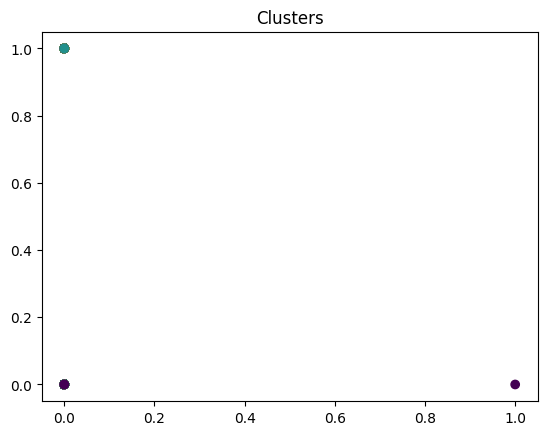

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans MinMaxScaler

In [ ]:
X = X_0.copy()
X.shape

(513, 66)

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.129

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.129

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.138

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.140

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.122

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.129

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.063

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.122

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.118

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.130

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.120

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.122

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.137

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.138

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.148

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 3, 'random_state': 120, 'silhouette': 0.15419569609154346}

Best Silhouette Coefficient: 0.154




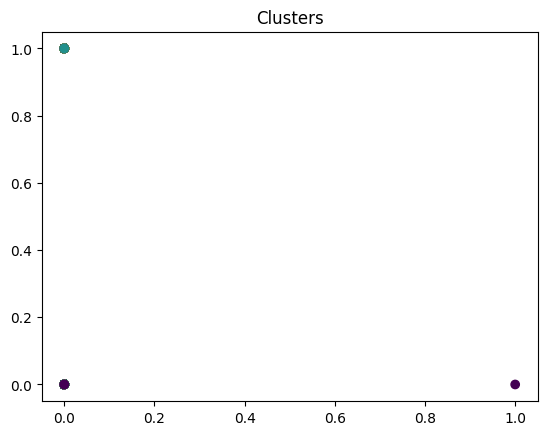

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA

In [ ]:
X = X_0.copy()
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.419

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.384

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.383

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.384

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.384

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.419

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.418

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.420

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 50, 'silhouette': 0.5713746470531692}

Best Silhouette Coefficient: 0.571




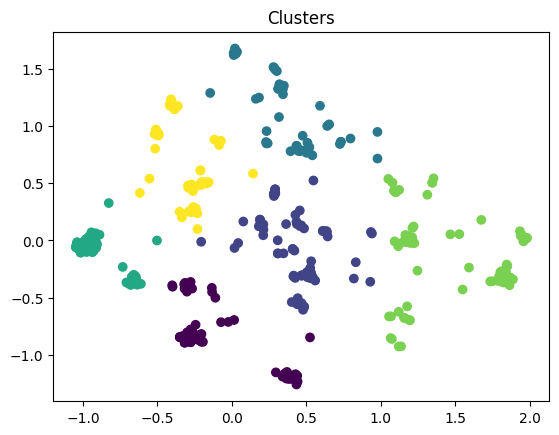

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA com MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.419

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.384

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.383

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.384

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.384

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.419

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.418

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.420

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 50, 'silhouette': 0.5713743418987303}

Best Silhouette Coefficient: 0.571




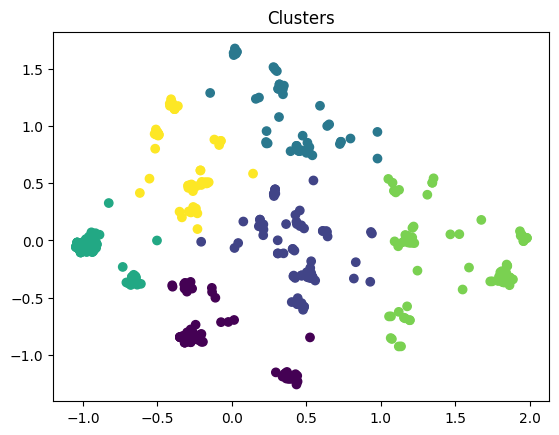

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## Usando MeanShift

In [ ]:
X = X_0.copy()
X.shape

(513, 66)

In [ ]:
[print(q/10, s) for q in range(0, 11) for s in range(100, 201, 50)]

0.0 100
0.0 150
0.0 200
0.1 100
0.1 150
0.1 200
0.2 100
0.2 150
0.2 200
0.3 100
0.3 150
0.3 200
0.4 100
0.4 150
0.4 200
0.5 100
0.5 150
0.5 200
0.6 100
0.6 150
0.6 200
0.7 100
0.7 150
0.7 200
0.8 100
0.8 150
0.8 200
0.9 100
0.9 150
0.9 200
1.0 100
1.0 150
1.0 200


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
list_estimate_bandwidth = [estimate_bandwidth(X, quantile=q/10, n_samples=s) for q in range(1, 11) for s in range(100, 201, 50)]
list_estimate_bandwidth

[2.2206078902783113,
 2.2422541120307824,
 2.2311344557292356,
 2.41810520451602,
 2.4409021181174526,
 2.427094999371683,
 2.6157713223814953,
 2.6061171939945567,
 2.5896965741094924,
 2.665215608133052,
 2.685876470303153,
 2.6746890426821266,
 2.737847005267797,
 2.77321449425101,
 2.7610341166509853,
 2.914267466542376,
 2.9219052746644034,
 2.908325819014812,
 2.95972547828337,
 2.9754119252045808,
 2.968231874571188,
 3.0462063516886104,
 3.1408426191612104,
 3.090475509459285,
 3.210569492963479,
 3.2157519299174577,
 3.208419841579576,
 3.464101615137754,
 3.464101615137753,
 3.4641016151377553]

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

In [ ]:
best_model

{'quantile': None,
 'n_samples': None,
 'labels': None,
 'n_clusters_': None,
 'cluster_centers': None,
 'silhouette': -1}

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X[my_members, 0], X[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

TypeError: ignored

<Figure size 640x480 with 0 Axes>

## Usando MeanShift PCA

In [ ]:
X = X_0.copy()
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 0.42306091809665924, quantile = 1, n_samples = 100
number of estimated clusters : 13
Silhouette Coefficient: 0.660


bandwidth = 0.4164865381638144, quantile = 1, n_samples = 150
number of estimated clusters : 14
Silhouette Coefficient: 0.667


bandwidth = 0.41791146978750915, quantile = 1, n_samples = 200
number of estimated clusters : 14
Silhouette Coefficient: 0.667


bandwidth = 0.6471598385507594, quantile = 2, n_samples = 100
number of estimated clusters : 6
Silhouette Coefficient: 0.526


bandwidth = 0.7362124528341206, quantile = 2, n_samples = 150
number of estimated clusters : 5
Silhouette Coefficient: 0.528


bandwidth = 0.7235572547585077, quantile = 2, n_samples = 200
number of estimated clusters : 5
Silhouette Coefficient: 0.528


bandwidth = 0.942136075678572, quantile = 3, n_samples = 100
number of estimated clusters : 2
Silhouette Coefficient: 0.410


bandwidth = 1.012755557914538, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette Co

In [ ]:
best_model

{'quantile': 1,
 'n_samples': 150,
 'labels': array([ 4,  7,  6,  3,  8,  5,  7, 11, 11,  0, 12,  0,  7,  9,  4,  6, 13,
         0,  1,  0,  2,  0, 10,  7,  5,  7, 10,  8,  3,  9,  4,  6,  3,  0,
         6,  0,  9,  6,  0, 10,  0, 13, 10,  3, 11,  6, 13,  5,  7,  1, 10,
         4,  8, 10,  6,  3,  6,  7, 13,  0,  1,  0,  0,  5,  3,  0,  4,  2,
         0,  5,  5,  3,  7,  9,  9,  4, 12,  3,  2,  0,  9,  5,  7,  1,  7,
         9,  0,  1,  0, 10, 12, 12,  0,  0,  0,  0,  9,  0,  4,  0,  0,  3,
         0,  2,  2,  9, 10, 10,  3,  1,  1,  5,  0,  4,  3,  1,  4,  1,  3,
         8,  3,  4,  5,  9,  5,  8,  7,  5,  2,  7,  1,  0, 12,  7,  9,  1,
         0,  0,  0, 12,  6,  5,  3,  8,  8,  1,  4,  1,  0,  0,  0,  7,  8,
         0,  1,  1,  3,  6,  2,  0,  7,  0, 11, 11,  1, 11,  0,  9,  3,  1,
         1, 10, 12,  0,  1,  8,  1, 11,  1,  2, 13,  3,  1,  1, 11,  4,  1,
         3,  0,  7,  1,  0,  1,  5, 11, 11,  3,  0, 11, 12,  4,  9,  5,  0,
         0,  7,  6,  2,  0,  2, 12,  5,  7,

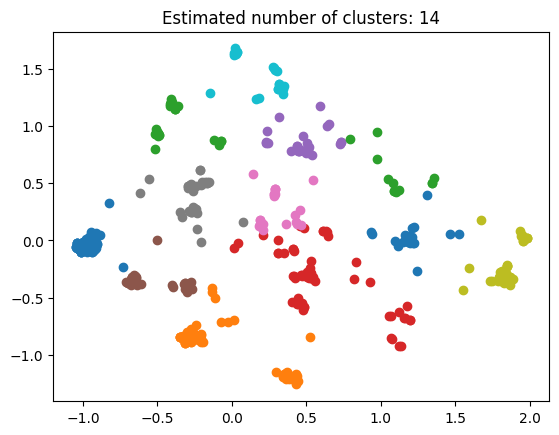

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Usando MeanShift PCA Com MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 0.4230605854198051, quantile = 1, n_samples = 100
number of estimated clusters : 13
Silhouette Coefficient: 0.660


bandwidth = 0.41648649631765133, quantile = 1, n_samples = 150
number of estimated clusters : 14
Silhouette Coefficient: 0.667


bandwidth = 0.4179110220808034, quantile = 1, n_samples = 200
number of estimated clusters : 14
Silhouette Coefficient: 0.667


bandwidth = 0.6471594818379812, quantile = 2, n_samples = 100
number of estimated clusters : 6
Silhouette Coefficient: 0.526


bandwidth = 0.7362124394024724, quantile = 2, n_samples = 150
number of estimated clusters : 5
Silhouette Coefficient: 0.528


bandwidth = 0.7235575417534409, quantile = 2, n_samples = 200
number of estimated clusters : 5
Silhouette Coefficient: 0.528


bandwidth = 0.9421354348822234, quantile = 3, n_samples = 100
number of estimated clusters : 2
Silhouette Coefficient: 0.410


bandwidth = 1.0127555881789414, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette C

In [ ]:
best_model

{'quantile': 1,
 'n_samples': 150,
 'labels': array([ 4,  7,  6,  3,  8,  5,  7, 11, 11,  0, 12,  0,  7,  9,  4,  6, 13,
         0,  1,  0,  2,  0, 10,  7,  5,  7, 10,  8,  3,  9,  4,  6,  3,  0,
         6,  0,  9,  6,  0, 10,  0, 13, 10,  3, 11,  6, 13,  5,  7,  1, 10,
         4,  8, 10,  6,  3,  6,  7, 13,  0,  1,  0,  0,  5,  3,  0,  4,  2,
         0,  5,  5,  3,  7,  9,  9,  4, 12,  3,  2,  0,  9,  5,  7,  1,  7,
         9,  0,  1,  0, 10, 12, 12,  0,  0,  0,  0,  9,  0,  4,  0,  0,  3,
         0,  2,  2,  9, 10, 10,  3,  1,  1,  5,  0,  4,  3,  1,  4,  1,  3,
         8,  3,  4,  5,  9,  5,  8,  7,  5,  2,  7,  1,  0, 12,  7,  9,  1,
         0,  0,  0, 12,  6,  5,  3,  8,  8,  1,  4,  1,  0,  0,  0,  7,  8,
         0,  1,  1,  3,  6,  2,  0,  7,  0, 11, 11,  1, 11,  0,  9,  3,  1,
         1, 10, 12,  0,  1,  8,  1, 11,  1,  2, 13,  3,  1,  1, 11,  4,  1,
         3,  0,  7,  1,  0,  1,  5, 11, 11,  3,  0, 11, 12,  4,  9,  5,  0,
         0,  7,  6,  2,  0,  2, 12,  5,  7,

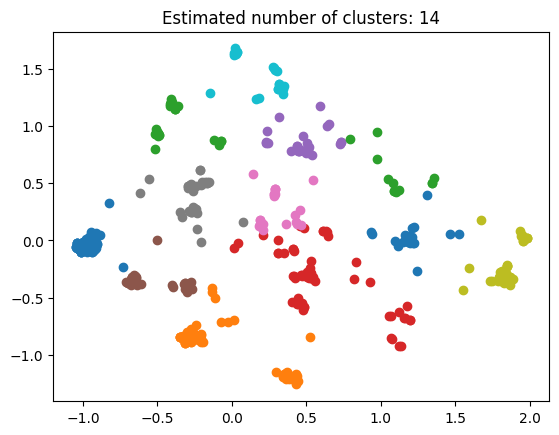

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## GaussianMixture

In [ ]:
X = X_0.copy()
X.shape

(513, 66)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X)
    labels = gaussiam.predict(X)
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.114

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.145

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.081

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.144

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.030

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.154

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.025

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.140

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.024

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.118

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.036

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.119

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.152

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 3,
 'covariance_type': 'tied',
 'silhouette': 0.15449154845701524}

Best Silhouette Coefficient: 0.154




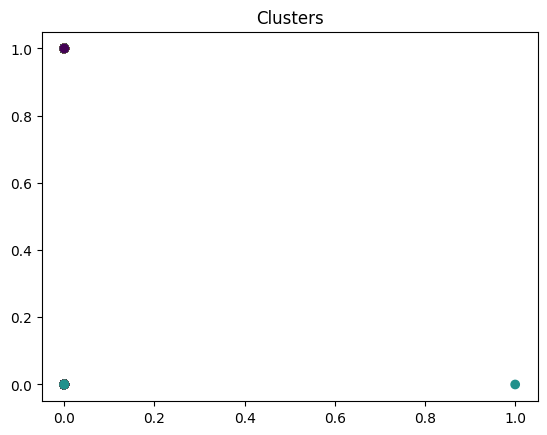

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture MinMaxScaler

In [ ]:
X = X_0.copy()
X.shape

(513, 66)

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X)
    labels = gaussiam.predict(X)
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.122

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.111

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.114

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.122

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.001

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.100

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.096

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.101

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.123

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.145

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.043

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.130

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.095

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 4,
 'covariance_type': 'tied',
 'silhouette': 0.1448030899337872}

Best Silhouette Coefficient: 0.145




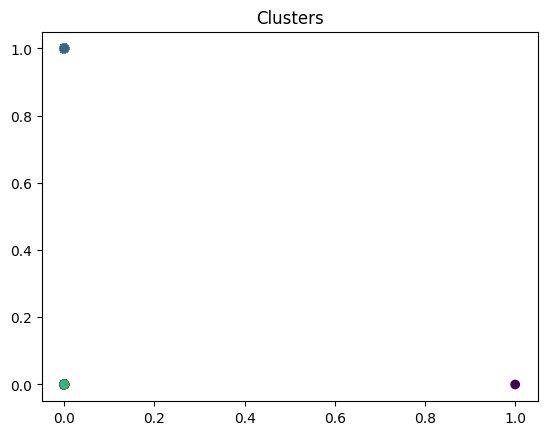

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture PCA

In [ ]:
X = X_0.copy()
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X_pca)
    labels = gaussiam.predict(X_pca)
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.394

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.384

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.390

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.238

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.443

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.463

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.352

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.488

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.493

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.530

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.488

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.493

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.452

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 6, 'covariance_type': 'tied', 'silhouette': 0.552160388751852}

Best Silhouette Coefficient: 0.552




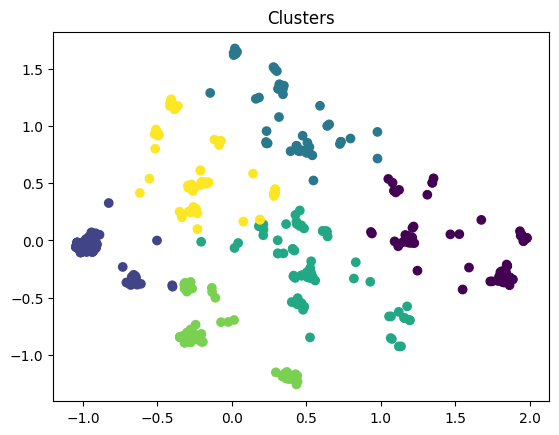

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture PCA MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X_pca)
    labels = gaussiam.predict(X_pca)
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.394

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.413

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.234

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.238

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.446

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.463

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.352

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.199

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.493

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.530

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.295

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.493

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.505

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 4,
 'covariance_type': 'tied',
 'silhouette': 0.5299160255219163}

Best Silhouette Coefficient: 0.530




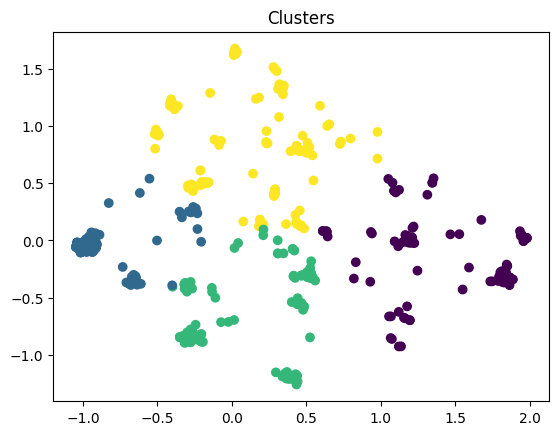

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

# One Hot (votações e temas)
# {votos_codificados_one_hot + df_qtde_temas_deputados.iloc[:, 1:]}

## Conjunto de experimento

In [ ]:
df_qtde_temas_deputados.iloc[:, 1:]

,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
0,82,2,4,1,1,2,2,2,1
1,63,1,3,1,0,0,1,0,2
2,128,1,3,0,2,0,0,0,1
3,43,2,2,0,1,1,1,1,1
4,40,1,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
508,112,1,1,0,1,0,0,0,2
509,112,2,4,1,1,2,2,2,1
510,58,2,5,1,1,2,2,2,1
511,130,0,0,0,0,0,0,0,0


In [ ]:
df_qtde_temas_deputados.iloc[:, 1:].values

array([[ 82,   2,   4, ...,   2,   2,   1],
       [ 63,   1,   3, ...,   1,   0,   2],
       [128,   1,   3, ...,   0,   0,   1],
       ...,
       [ 58,   2,   5, ...,   2,   2,   1],
       [130,   0,   0, ...,   0,   0,   0],
       [ 79,   1,   1, ...,   0,   0,   1]])

In [ ]:
X_0 = np.concatenate((votos_codificados_one_hot, df_qtde_temas_deputados.iloc[:, 1:].values), axis=1)

print(votos_codificados_one_hot.shape, df_qtde_temas_deputados.iloc[:, 1:].values.shape)
print(X_0.shape)
X_0 

(513, 17) (513, 9)
(513, 26)


array([[0., 0., 1., ..., 2., 2., 1.],
       [0., 1., 0., ..., 1., 0., 2.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 2., 2., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## KMeans

In [ ]:
X = X_0.copy()
X.shape

(513, 26)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.621

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 2, 'random_state': 80, 'silhouette': 0.6209605801691783}

Best Silhouette Coefficient: 0.621




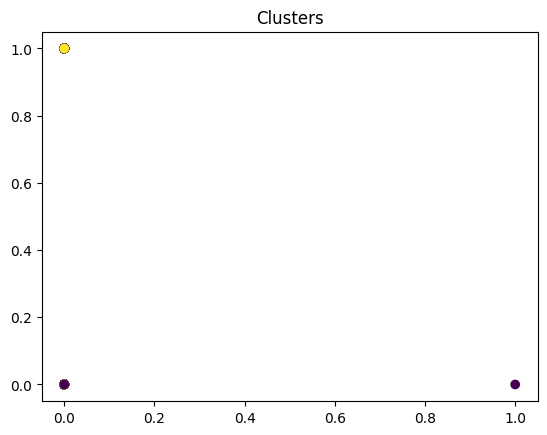

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans MinMaxScaler

In [ ]:
X = X_0.copy()
X.shape

(513, 26)

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.234

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.233

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.245

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.251

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.251

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.226

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.226

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.251

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.251

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.234

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.251

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.237

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.253

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.250

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.262

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 130, 'silhouette': 0.3386728278978748}

Best Silhouette Coefficient: 0.339




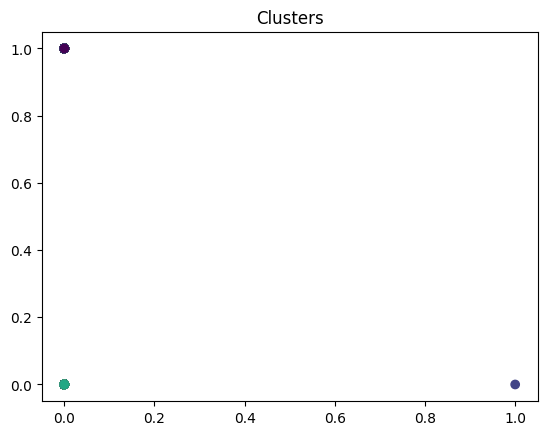

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA

In [ ]:
X = X_0.copy()
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.626

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 2, 'random_state': 80, 'silhouette': 0.6255795532798791}

Best Silhouette Coefficient: 0.626




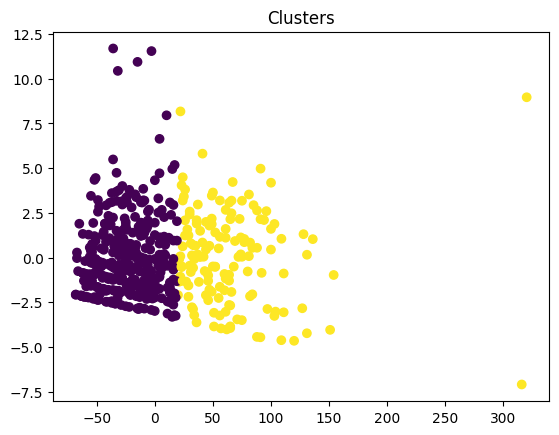

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA com MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.414

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.414

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.421

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.440

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.418

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.418

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.418

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.421

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.418

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.421

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.418

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.412

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.421

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.414

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 130, 'silhouette': 0.6103040319178065}

Best Silhouette Coefficient: 0.610




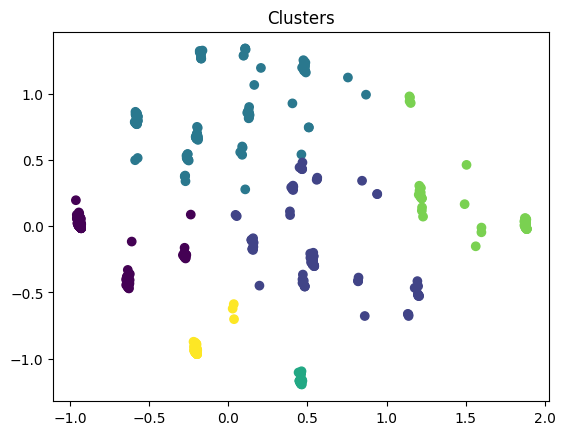

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## Usando MeanShift

In [ ]:
X = X_0.copy()
X.shape

(513, 26)

In [ ]:
[print(q/10, s) for q in range(0, 11) for s in range(100, 201, 50)]

0.0 100
0.0 150
0.0 200
0.1 100
0.1 150
0.1 200
0.2 100
0.2 150
0.2 200
0.3 100
0.3 150
0.3 200
0.4 100
0.4 150
0.4 200
0.5 100
0.5 150
0.5 200
0.6 100
0.6 150
0.6 200
0.7 100
0.7 150
0.7 200
0.8 100
0.8 150
0.8 200
0.9 100
0.9 150
0.9 200
1.0 100
1.0 150
1.0 200


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
list_estimate_bandwidth = [estimate_bandwidth(X, quantile=q/10, n_samples=s) for q in range(1, 11) for s in range(100, 201, 50)]
list_estimate_bandwidth

[2.2206078902783113,
 2.2422541120307824,
 2.2311344557292356,
 2.41810520451602,
 2.4409021181174526,
 2.427094999371683,
 2.6157713223814953,
 2.6061171939945567,
 2.5896965741094924,
 2.665215608133052,
 2.685876470303153,
 2.6746890426821266,
 2.737847005267797,
 2.77321449425101,
 2.7610341166509853,
 2.914267466542376,
 2.9219052746644034,
 2.908325819014812,
 2.95972547828337,
 2.9754119252045808,
 2.968231874571188,
 3.0462063516886104,
 3.1408426191612104,
 3.090475509459285,
 3.210569492963479,
 3.2157519299174577,
 3.208419841579576,
 3.464101615137754,
 3.464101615137753,
 3.4641016151377553]

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 13.175239909653074, quantile = 1, n_samples = 100
number of estimated clusters : 12
Silhouette Coefficient: 0.345


bandwidth = 12.420571727879091, quantile = 1, n_samples = 150
number of estimated clusters : 13
Silhouette Coefficient: 0.397


bandwidth = 13.554339470993487, quantile = 1, n_samples = 200
number of estimated clusters : 11
Silhouette Coefficient: 0.460


bandwidth = 22.38323230727321, quantile = 2, n_samples = 100
number of estimated clusters : 4
Silhouette Coefficient: 0.568


bandwidth = 21.574626959867917, quantile = 2, n_samples = 150
number of estimated clusters : 4
Silhouette Coefficient: 0.566


bandwidth = 22.507804481785275, quantile = 2, n_samples = 200
number of estimated clusters : 4
Silhouette Coefficient: 0.568


bandwidth = 31.9374609213687, quantile = 3, n_samples = 100
number of estimated clusters : 2
Silhouette Coefficient: 0.756


bandwidth = 30.463975820239295, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette Coeff

In [ ]:
best_model

{'quantile': 8,
 'n_samples': 100,
 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

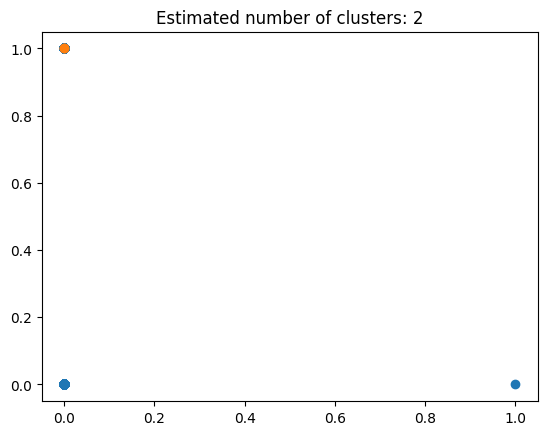

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X[my_members, 0], X[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Usando MeanShift PCA

In [ ]:
X = X_0.copy()
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 12.46922167375047, quantile = 1, n_samples = 100
number of estimated clusters : 10
Silhouette Coefficient: 0.481


bandwidth = 11.696797541955226, quantile = 1, n_samples = 150
number of estimated clusters : 13
Silhouette Coefficient: 0.463


bandwidth = 12.808887253164075, quantile = 1, n_samples = 200
number of estimated clusters : 10
Silhouette Coefficient: 0.480


bandwidth = 21.9664436904649, quantile = 2, n_samples = 100
number of estimated clusters : 4
Silhouette Coefficient: 0.568


bandwidth = 21.177106316968537, quantile = 2, n_samples = 150
number of estimated clusters : 4
Silhouette Coefficient: 0.573


bandwidth = 22.039619601257172, quantile = 2, n_samples = 200
number of estimated clusters : 4
Silhouette Coefficient: 0.574


bandwidth = 31.592910365095744, quantile = 3, n_samples = 100
number of estimated clusters : 2
Silhouette Coefficient: 0.758


bandwidth = 30.14306547998364, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette Coeffi

In [ ]:
best_model

{'quantile': 8,
 'n_samples': 100,
 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

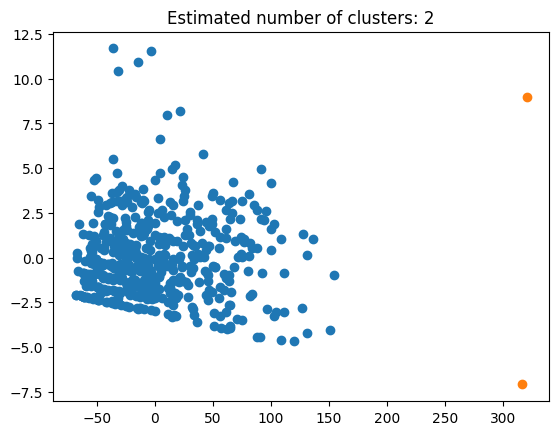

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Usando MeanShift PCA Com MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 0.42703989073473436, quantile = 1, n_samples = 100
number of estimated clusters : 13
Silhouette Coefficient: 0.737


bandwidth = 0.3913487993918337, quantile = 1, n_samples = 150
number of estimated clusters : 14
Silhouette Coefficient: 0.748


bandwidth = 0.3877017875991306, quantile = 1, n_samples = 200
number of estimated clusters : 13
Silhouette Coefficient: 0.709


bandwidth = 0.6426067946347223, quantile = 2, n_samples = 100
number of estimated clusters : 7
Silhouette Coefficient: 0.565


bandwidth = 0.754293387478005, quantile = 2, n_samples = 150
number of estimated clusters : 4
Silhouette Coefficient: 0.492


bandwidth = 0.7559741908971555, quantile = 2, n_samples = 200
number of estimated clusters : 5
Silhouette Coefficient: 0.556


bandwidth = 0.8993485295704555, quantile = 3, n_samples = 100
number of estimated clusters : 4
Silhouette Coefficient: 0.473


bandwidth = 0.9536966241438722, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette Co

In [ ]:
best_model

{'quantile': 1,
 'n_samples': 150,
 'labels': array([ 6,  2,  8,  3,  7,  4,  2, 10, 10,  0, 13,  0,  2,  5,  5,  6, 12,
         4,  1,  0,  2,  0,  9,  2,  4,  2,  9,  7,  8,  6,  5,  8,  8,  0,
         6,  0, 11,  8,  0,  9,  0, 12,  9, 12, 10,  8, 12,  4,  2,  1,  9,
         5,  7,  9,  8,  3,  6,  2, 12,  0,  1,  0,  0,  8,  3,  0,  6,  2,
         0,  8,  4,  3,  2,  5, 11,  6,  9,  3,  2,  0,  6,  4,  2,  1,  2,
         6,  0,  1,  0,  9, 13, 13,  0,  0,  0,  0,  5,  0,  5,  0,  0,  3,
         0,  2,  2, 11,  9,  9,  8,  1,  1,  8,  0,  5,  3,  1,  5,  1,  3,
         7,  3,  5,  4, 11,  4,  7,  2,  4,  2,  2,  1,  0,  9,  2, 11,  1,
         0,  0,  0,  9,  8,  4,  3,  7,  7,  1,  5,  1,  0,  0,  0,  2,  7,
         0,  1,  1,  3,  3,  2,  0,  2,  0, 10, 10,  1, 10,  0,  5,  6,  1,
         1, 12, 13,  0,  1,  7,  1, 10,  1,  2, 12,  3,  1,  1, 10,  5,  1,
         3,  0,  6,  1,  0,  1,  8, 10, 10,  6,  0, 10, 13,  6, 11,  4,  0,
         0,  2,  6,  2,  0,  2,  9,  4,  2,

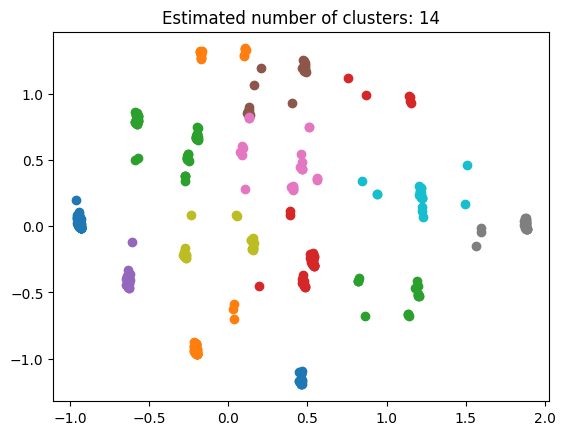

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## GaussianMixture

In [ ]:
X = X_0.copy()
X.shape

(513, 26)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X)
    labels = gaussiam.predict(X)
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.081

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.553

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.075

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.577

n_components = 3, covariance_type = full
Silhouette Coefficient: -0.065

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.477

n_components = 3, covariance_type = diag
Silhouette Coefficient: -0.073

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.502

n_components = 4, covariance_type = full
Silhouette Coefficient: -0.089

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.215

n_components = 4, covariance_type = diag
Silhouette Coefficient: -0.069

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.518

n_components = 5, covariance_type = full
Silhouette Coefficient: -0.291

n_components = 5, covariance_type = tied
Sil

In [ ]:
best_model

{'n_components': 2,
 'covariance_type': 'spherical',
 'silhouette': 0.5767958710125785}

Best Silhouette Coefficient: 0.577




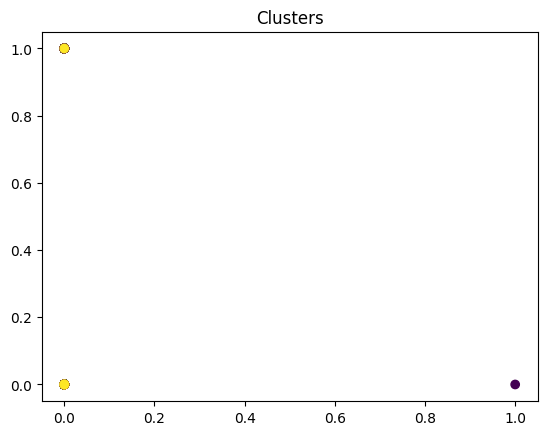

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture MinMaxScaler

In [ ]:
X = X_0.copy()
X.shape

(513, 26)

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X)
    labels = gaussiam.predict(X)
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.226

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.236

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.237

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.185

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.264

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.242

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.246

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.234

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.281

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.289

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.242

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.178

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.131

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 6, 'covariance_type': 'tied', 'silhouette': 0.327899037935973}

Best Silhouette Coefficient: 0.328




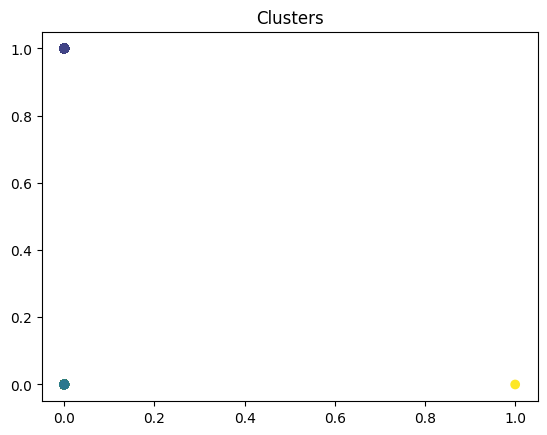

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture PCA

In [ ]:
X = X_0.copy()
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X_pca)
    labels = gaussiam.predict(X_pca)
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.452

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.606

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.522

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.598

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.390

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.466

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.345

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.526

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.387

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.548

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.409

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.534

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.337

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 2,
 'covariance_type': 'tied',
 'silhouette': 0.6062897289003837}

Best Silhouette Coefficient: 0.606




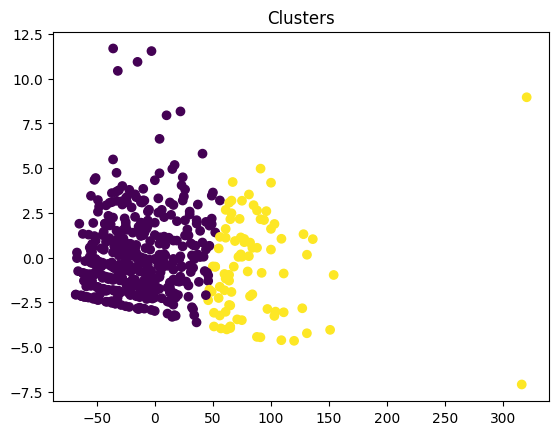

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture PCA MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X_pca)
    labels = gaussiam.predict(X_pca)
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.379

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.416

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.421

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.234

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.432

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.359

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.302

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.269

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.503

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.554

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.496

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.517

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.542

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 6,
 'covariance_type': 'tied',
 'silhouette': 0.5719688931534637}

Best Silhouette Coefficient: 0.572




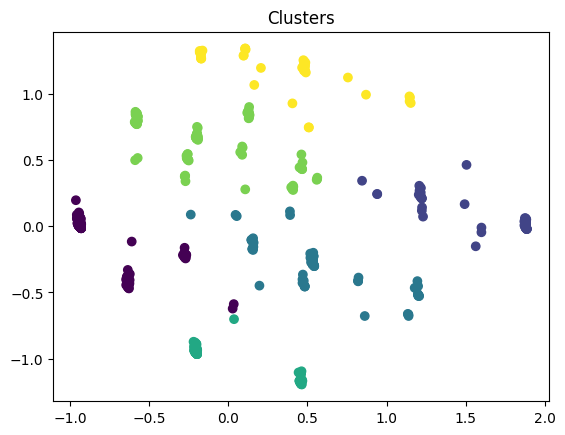

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

# One Hot GERAL(votações, estado, partido e temas)
# {votos_codificados_one_hot + uf_codificado + partido_codificado + df_qtde_temas_deputados.iloc[:, 1:]}

## Conjunto de experimento

In [ ]:
df_qtde_temas_deputados.iloc[:, 1:]

,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
0,82,2,4,1,1,2,2,2,1
1,63,1,3,1,0,0,1,0,2
2,128,1,3,0,2,0,0,0,1
3,43,2,2,0,1,1,1,1,1
4,40,1,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
508,112,1,1,0,1,0,0,0,2
509,112,2,4,1,1,2,2,2,1
510,58,2,5,1,1,2,2,2,1
511,130,0,0,0,0,0,0,0,0


In [ ]:
df_qtde_temas_deputados.iloc[:, 1:].values

array([[ 82,   2,   4, ...,   2,   2,   1],
       [ 63,   1,   3, ...,   1,   0,   2],
       [128,   1,   3, ...,   0,   0,   1],
       ...,
       [ 58,   2,   5, ...,   2,   2,   1],
       [130,   0,   0, ...,   0,   0,   0],
       [ 79,   1,   1, ...,   0,   0,   1]])

In [ ]:
X_0 = np.concatenate((votos_codificados_one_hot, uf_codificado), axis=1)
X_0 = np.concatenate((X_0, partido_codificado), axis=1)
X_0 = np.concatenate((X_0, df_qtde_temas_deputados.iloc[:, 1:].values), axis=1)

print(votos_codificados_one_hot.shape, uf_codificado.shape, partido_codificado.shape, df_qtde_temas_deputados.iloc[:, 1:].values.shape)
print(X_0.shape)
X_0 

(513, 17) (513, 27) (513, 22) (513, 9)
(513, 75)


array([[0., 0., 1., ..., 2., 2., 1.],
       [0., 1., 0., ..., 1., 0., 2.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 2., 2., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## KMeans

In [ ]:
X = X_0.copy()
X.shape

(513, 75)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.620

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.620

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 2, 'random_state': 80, 'silhouette': 0.6197462691567491}

Best Silhouette Coefficient: 0.620




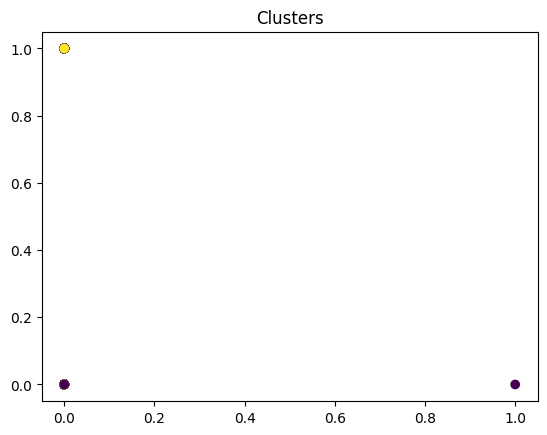

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans MinMaxScaler

In [ ]:
X = X_0.copy()
X.shape

(513, 75)

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.124

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.112

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.128

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.145

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.117

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.114

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.124

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.117

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.114

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.124

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.114

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.137

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.130

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.132

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.130

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 3, 'random_state': 120, 'silhouette': 0.1482365551914815}

Best Silhouette Coefficient: 0.148




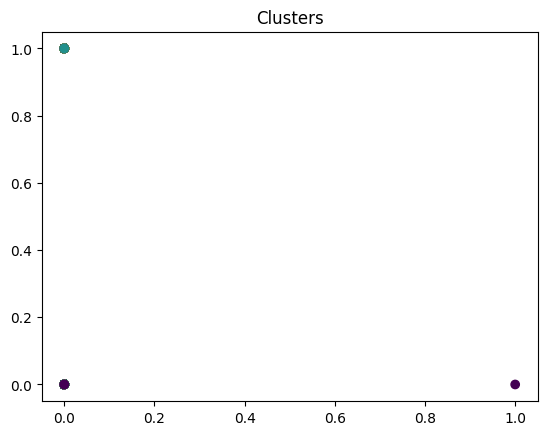

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA

In [ ]:
X = X_0.copy()
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.624

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.624

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.624

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.624

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.624

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.624

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.624

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.624

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.626

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 2, 'random_state': 80, 'silhouette': 0.6255503022145084}

Best Silhouette Coefficient: 0.626




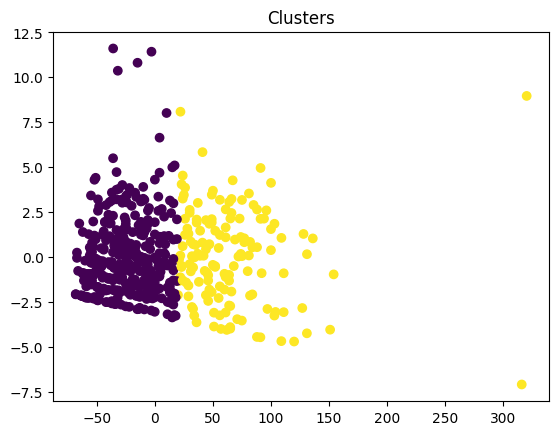

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA com MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.424

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.424

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.422

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.424

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.424

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.375

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.375

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.375

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.424

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.419

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.422

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 190, 'silhouette': 0.543989936954635}

Best Silhouette Coefficient: 0.544




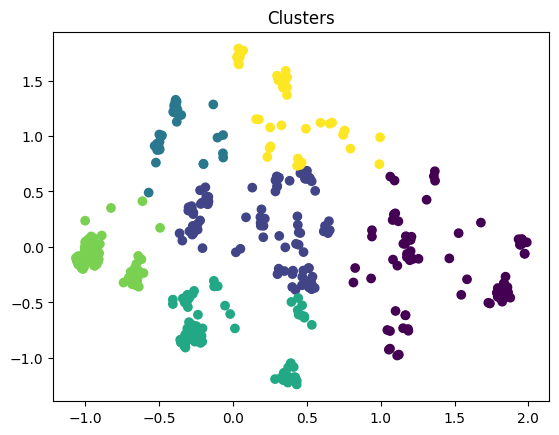

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## Usando MeanShift

In [ ]:
X = X_0.copy()
X.shape

(513, 75)

In [ ]:
[print(q/10, s) for q in range(0, 11) for s in range(100, 201, 50)]

0.0 100
0.0 150
0.0 200
0.1 100
0.1 150
0.1 200
0.2 100
0.2 150
0.2 200
0.3 100
0.3 150
0.3 200
0.4 100
0.4 150
0.4 200
0.5 100
0.5 150
0.5 200
0.6 100
0.6 150
0.6 200
0.7 100
0.7 150
0.7 200
0.8 100
0.8 150
0.8 200
0.9 100
0.9 150
0.9 200
1.0 100
1.0 150
1.0 200


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
list_estimate_bandwidth = [estimate_bandwidth(X, quantile=q/10, n_samples=s) for q in range(1, 11) for s in range(100, 201, 50)]
list_estimate_bandwidth

[2.2206078902783113,
 2.2422541120307824,
 2.2311344557292356,
 2.41810520451602,
 2.4409021181174526,
 2.427094999371683,
 2.6157713223814953,
 2.6061171939945567,
 2.5896965741094924,
 2.665215608133052,
 2.685876470303153,
 2.6746890426821266,
 2.737847005267797,
 2.77321449425101,
 2.7610341166509853,
 2.914267466542376,
 2.9219052746644034,
 2.908325819014812,
 2.95972547828337,
 2.9754119252045808,
 2.968231874571188,
 3.0462063516886104,
 3.1408426191612104,
 3.090475509459285,
 3.210569492963479,
 3.2157519299174577,
 3.208419841579576,
 3.464101615137754,
 3.464101615137753,
 3.4641016151377553]

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 13.419957892916818, quantile = 1, n_samples = 100
number of estimated clusters : 13
Silhouette Coefficient: 0.345


bandwidth = 12.649197700438442, quantile = 1, n_samples = 150
number of estimated clusters : 13
Silhouette Coefficient: 0.366


bandwidth = 13.777608531237847, quantile = 1, n_samples = 200
number of estimated clusters : 11
Silhouette Coefficient: 0.453


bandwidth = 22.508893390317624, quantile = 2, n_samples = 100
number of estimated clusters : 4
Silhouette Coefficient: 0.566


bandwidth = 21.70066046666323, quantile = 2, n_samples = 150
number of estimated clusters : 4
Silhouette Coefficient: 0.564


bandwidth = 22.634767561565504, quantile = 2, n_samples = 200
number of estimated clusters : 4
Silhouette Coefficient: 0.566


bandwidth = 32.02126922891402, quantile = 3, n_samples = 100
number of estimated clusters : 2
Silhouette Coefficient: 0.756


bandwidth = 30.552299577329688, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette Coef

In [ ]:
best_model

{'quantile': 8,
 'n_samples': 100,
 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

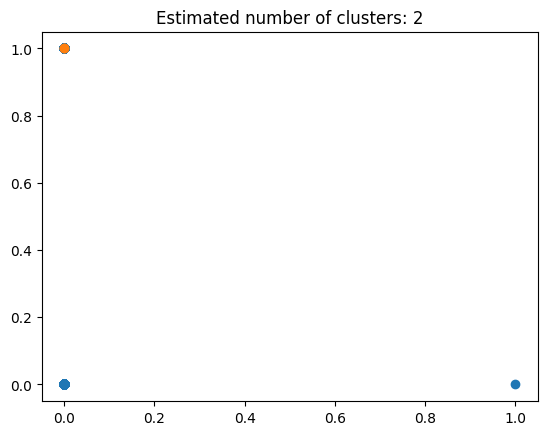

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X[my_members, 0], X[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Usando MeanShift MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

In [ ]:
best_model

{'quantile': None,
 'n_samples': None,
 'labels': None,
 'n_clusters_': None,
 'cluster_centers': None,
 'silhouette': -1}

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

TypeError: ignored

<Figure size 640x480 with 0 Axes>

## Usando MeanShift PCA

In [ ]:
X = X_0.copy()
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 12.480199177199964, quantile = 1, n_samples = 100
number of estimated clusters : 10
Silhouette Coefficient: 0.480


bandwidth = 11.70364675604627, quantile = 1, n_samples = 150
number of estimated clusters : 13
Silhouette Coefficient: 0.463


bandwidth = 12.815796176200386, quantile = 1, n_samples = 200
number of estimated clusters : 10
Silhouette Coefficient: 0.480


bandwidth = 21.970977436329264, quantile = 2, n_samples = 100
number of estimated clusters : 4
Silhouette Coefficient: 0.568


bandwidth = 21.18110982310357, quantile = 2, n_samples = 150
number of estimated clusters : 4
Silhouette Coefficient: 0.575


bandwidth = 22.040325760779268, quantile = 2, n_samples = 200
number of estimated clusters : 4
Silhouette Coefficient: 0.568


bandwidth = 31.594410451215126, quantile = 3, n_samples = 100
number of estimated clusters : 2
Silhouette Coefficient: 0.758


bandwidth = 30.146453862268718, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette Coef

In [ ]:
best_model

{'quantile': 8,
 'n_samples': 100,
 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

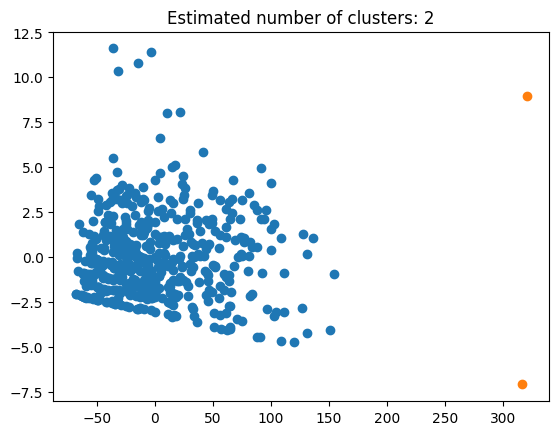

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Usando MeanShift PCA Com MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 0.4180473764006167, quantile = 1, n_samples = 100
number of estimated clusters : 12
Silhouette Coefficient: 0.642


bandwidth = 0.43417165317975775, quantile = 1, n_samples = 150
number of estimated clusters : 12
Silhouette Coefficient: 0.644


bandwidth = 0.43337467921381545, quantile = 1, n_samples = 200
number of estimated clusters : 12
Silhouette Coefficient: 0.644


bandwidth = 0.653398771365748, quantile = 2, n_samples = 100
number of estimated clusters : 5
Silhouette Coefficient: 0.531


bandwidth = 0.7321803539907026, quantile = 2, n_samples = 150
number of estimated clusters : 5
Silhouette Coefficient: 0.518


bandwidth = 0.7273526862227737, quantile = 2, n_samples = 200
number of estimated clusters : 5
Silhouette Coefficient: 0.518


bandwidth = 0.9427618900840683, quantile = 3, n_samples = 100
number of estimated clusters : 3
Silhouette Coefficient: 0.493


bandwidth = 1.0062673512719884, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette C

In [ ]:
best_model

{'quantile': 1,
 'n_samples': 150,
 'labels': array([11,  4,  2,  2,  5,  0,  4,  9,  9,  0,  8,  0,  4,  7,  2,  2, 10,
         0,  1,  0,  6,  0,  8,  4,  0,  4,  8,  5,  2,  7,  2,  2,  4,  0,
         3,  0,  7,  2,  0,  8,  0, 10,  8,  3,  9,  2, 10,  0,  4,  1,  8,
         2,  5,  8,  2,  3,  2,  4, 10,  0,  1,  0,  0,  1,  3,  0, 11,  6,
         0,  1,  0,  2,  4,  7,  7, 11, 11,  3,  6,  0,  7,  0,  4,  1,  4,
         7,  0,  1,  0,  8, 11,  8,  0,  0,  0,  0,  7,  0,  2,  0,  0,  3,
         0,  6,  6,  7,  8,  8,  4,  1,  1,  1,  0,  2,  3,  1,  2,  1,  3,
         5,  2,  2,  0,  7,  0,  5,  4,  0,  6,  4,  1,  0, 11,  4,  7,  1,
         0,  0,  0, 11,  2,  0,  3,  5,  5,  1,  7,  1,  0,  0,  0,  4,  5,
         0,  1,  1,  3,  2,  6,  0,  4,  0,  9,  9,  1,  9,  0,  7,  3,  1,
         1,  8,  8,  0,  1,  5,  1,  9,  1,  6, 10,  3,  1,  1,  9,  2,  1,
         3,  0,  4,  1,  0,  1,  1,  9,  9,  3,  0,  9, 11, 11,  7,  0,  0,
         0,  6,  3,  6,  0,  6, 11,  0,  4,

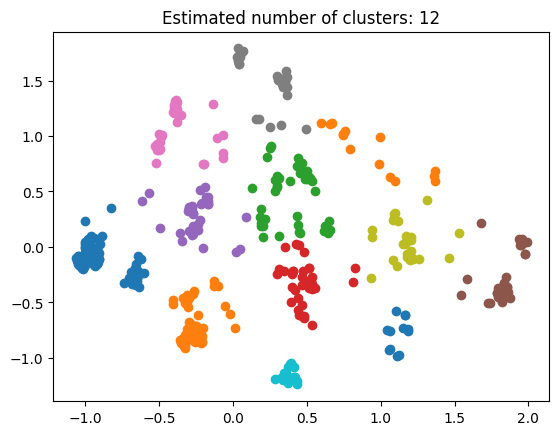

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## GaussianMixture

In [ ]:
X = X_0.copy()
X.shape

(513, 75)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X)
    labels = gaussiam.predict(X)
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: -0.037

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.547

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.067

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.575

n_components = 3, covariance_type = full
Silhouette Coefficient: -0.116

n_components = 3, covariance_type = tied
Silhouette Coefficient: -0.023

n_components = 3, covariance_type = diag
Silhouette Coefficient: -0.049

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.499

n_components = 4, covariance_type = full
Silhouette Coefficient: -0.021

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.364

n_components = 4, covariance_type = diag
Silhouette Coefficient: -0.045

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.483

n_components = 5, covariance_type = full
Silhouette Coefficient: -0.188

n_components = 5, covariance_type = tied
S

In [ ]:
best_model

{'n_components': 2,
 'covariance_type': 'spherical',
 'silhouette': 0.5753636674391486}

Best Silhouette Coefficient: 0.575




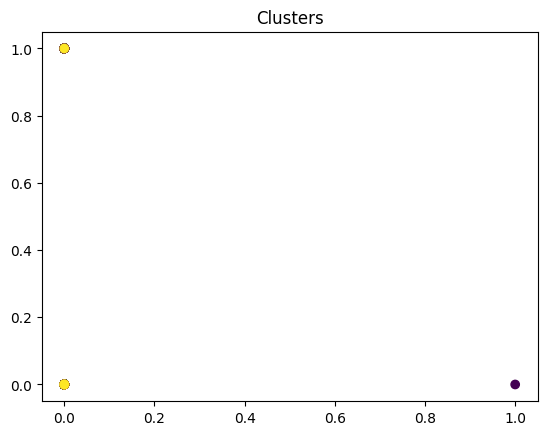

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture MinMaxScaler

In [ ]:
X = X_0.copy()
X.shape

(513, 75)

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X)
    labels = gaussiam.predict(X)
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.139

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.117

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.010

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.131

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.096

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.107

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.031

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.125

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.037

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.136

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.050

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.079

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.104

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 2,
 'covariance_type': 'full',
 'silhouette': 0.13941172004381133}

Best Silhouette Coefficient: 0.139




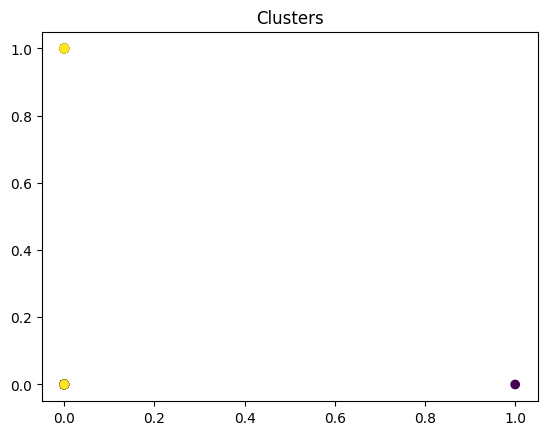

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## GaussianMixture PCA

In [ ]:
X = X_0.copy()
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X_pca)
    labels = gaussiam.predict(X_pca)
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.826

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.826

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.531

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.598

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.469

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.460

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.358

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.527

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.393

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.552

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.406

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.534

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.300

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 2,
 'covariance_type': 'full',
 'silhouette': 0.8264928034654312}

Best Silhouette Coefficient: 0.826




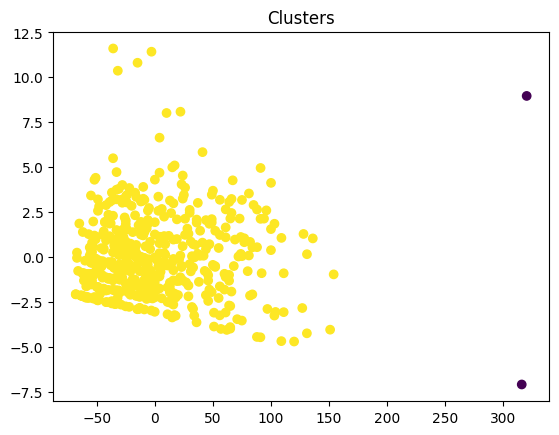

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

In [ ]:
list(y_pred).count(0)

2

## GaussianMixture PCA MinMaxScaler

In [ ]:
X = X_0.copy()
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
# Define modelo e parametros
parametros = {
                'n_components': [_ for _ in range(2, 7)],
                'covariance_type': ['full', 'tied', 'diag', 'spherical']
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_components': None,
    'covariance_type': None,
    'silhouette': silhouette
}

for n_components in parametros['n_components']:
  for covariance_type in parametros['covariance_type']:
    gaussiam = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gaussiam.fit(X_pca)
    labels = gaussiam.predict(X_pca)
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_components = {n_components}, covariance_type = {covariance_type}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = labels.copy()
      silhouette = silhouette_current
      best_model = {
          'n_components': n_components,
          'covariance_type': covariance_type,
          'silhouette': silhouette
      }

n_components = 2, covariance_type = full
Silhouette Coefficient: 0.376

n_components = 2, covariance_type = tied
Silhouette Coefficient: 0.414

n_components = 2, covariance_type = diag
Silhouette Coefficient: 0.408

n_components = 2, covariance_type = spherical
Silhouette Coefficient: 0.222

n_components = 3, covariance_type = full
Silhouette Coefficient: 0.458

n_components = 3, covariance_type = tied
Silhouette Coefficient: 0.462

n_components = 3, covariance_type = diag
Silhouette Coefficient: 0.339

n_components = 3, covariance_type = spherical
Silhouette Coefficient: 0.252

n_components = 4, covariance_type = full
Silhouette Coefficient: 0.461

n_components = 4, covariance_type = tied
Silhouette Coefficient: 0.473

n_components = 4, covariance_type = diag
Silhouette Coefficient: 0.464

n_components = 4, covariance_type = spherical
Silhouette Coefficient: 0.461

n_components = 5, covariance_type = full
Silhouette Coefficient: 0.417

n_components = 5, covariance_type = tied
Silhouet

In [ ]:
best_model

{'n_components': 5,
 'covariance_type': 'tied',
 'silhouette': 0.5346863864115146}

Best Silhouette Coefficient: 0.535




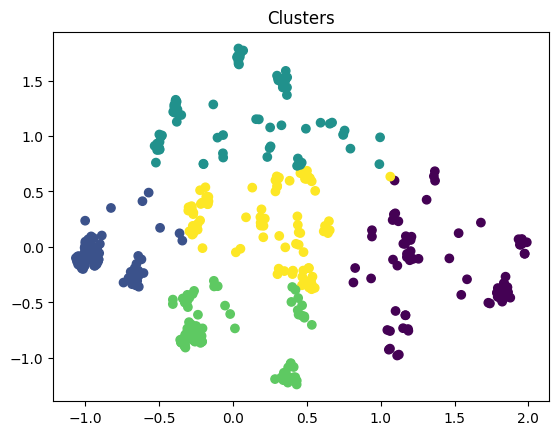

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()